In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 25

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 25

# The grid spacing is L/n

# The number of iterations
nsteps = 10

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

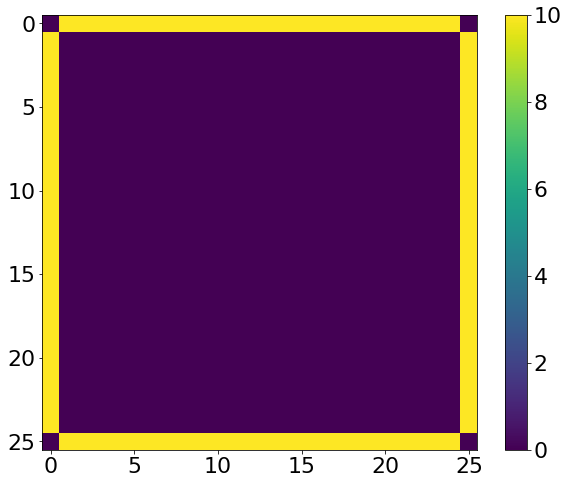

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

In [4]:
def c_1(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 5
        v[i,n] = 5

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')
    
def c_2(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 0
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')

In [5]:
### Random walk a)
def walk(x,y, steps): 
    xd = x
    yd = y
    hits = np.zeros((n+1, n+1))
    prev_R = None
    for i in range(steps):
        x = xd
        y = yd
        while 0 < x < n and 0 < y < n:
            while True:
                R = np.random.randint(0,4)  # Random number between 1 and 4

                if prev_R is None:
                    break
                elif prev_R == 0 and R != 1:
                    break
                elif prev_R == 1 and R != 0:
                    break
                elif prev_R == 2 and R != 3:
                    break
                elif prev_R == 3 and R != 2:
                    break

            prev_R = R

            if R < 2:   # Move on the x axis
                if R == 0:
                    R = 1
                else:
                    R = -1
                x += R
            else:       # Move on the y axis
                if R == 2:
                    R = 1
                else:
                    R = -1
                y += R
        # reached the border
        hits[x,y] += 1
    
    return hits


walkers = 500

G = [[[] for i in range(n+1)] for i in range(n+1)]  # Store the G function

In [ ]:
c_1(False) # Setup the geometry
for x in range(1,n):
    for y in range(1,n):
        w = walk(x,y, walkers)
        G[x][y] = w

In [90]:
with open("G.npy", "wb") as f:
    # Writing data to a file
    np.save(f, np.array(G))

C:\Users\Simon\AppData\Local\Temp/ipykernel_7980/57270929.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save(f, np.array(G))


In [6]:
with open("G.npy", "rb") as f:
    # Reading form a file
    G_read = np.load(f, allow_pickle=True)

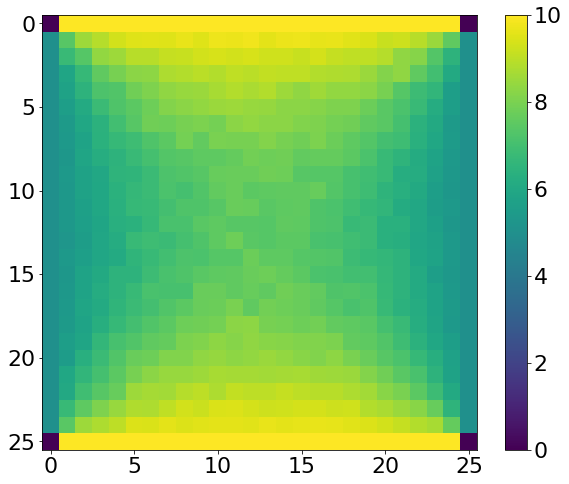

In [9]:
def Gsum(x,y):
    s = 0
    for i in range(1,n):
        # v[0,i] = 0
        # v[n,i] = 10
        # v[i,0] = 10
        # v[i,n] = 10
        s += G[x][y][0][i]*v[0,i]
        s += G[x][y][n][i]*v[n,i]
        s += G[x][y][i][0]*v[i,0]
        s += G[x][y][i][n]*v[i,n]
    
    return s

c_1(False)
for x in range(1,n):
    for y in range(1,n):
        v[x][y] = 1/walkers * Gsum(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None)
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

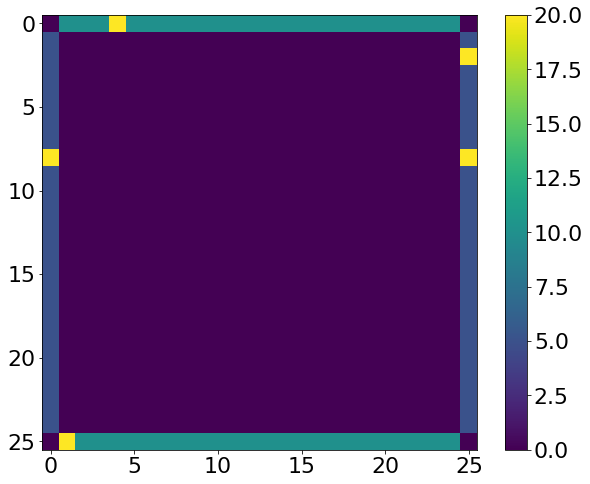

In [10]:
## b)

focus_point1 = (3,5)
focus_point2 = (5,3)

c_1(False) # Reset boundaries
R = [4, 1, 8, 2, 8] #np.random.randint(1,n,5)
v[0,R[0]] = 20
v[n,R[1]] = 20
v[R[2],0] = 20
v[R[3],n] = 20
v[R[4],n] = 20
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None)
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

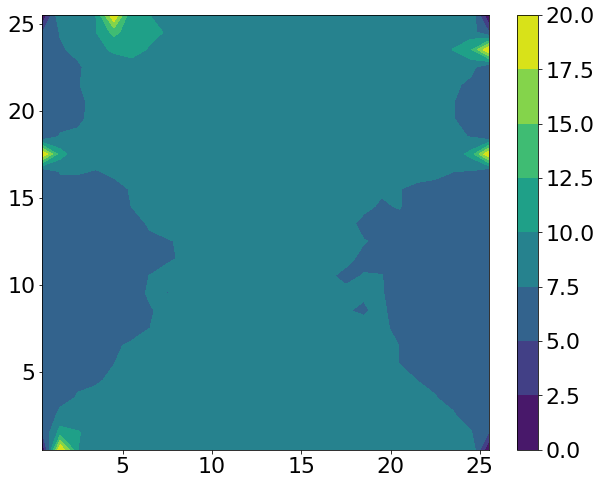

In [56]:
for x in range(1,n):
    for y in range(1,n):
        v[x][y] = 1/walkers * Gsum(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

In [54]:
# Find the 5 boundary sites that maximize the focus point 1


max5 = np.sort(G[focus_point1[0]][focus_point1[1]].reshape(1,(n+1)**2))[0]
max5 = max5[-5:len(max5)]
print(max5)

locations = [(np.where(G[focus_point1[0]][focus_point1[1]] == m)[0][0], np.where(G[focus_point1[0]][focus_point1[1]] == m)[1][0]) for m in max5]
    

[33. 36. 39. 43. 49.]


In [57]:
# calculate the potential at focus point 2
_Gsum = 0
for loc in locations:
    _Gsum += G[focus_point2[0]][focus_point2[1]][loc[0]][loc[1]]*v[loc[0]][loc[1]]

pot_focus_point_2 = 1/walkers * _Gsum

print(pot_focus_point_2)
print(v[focus_point2[0]][focus_point2[1]] - pot_focus_point_2)

1.9000000000000001
6.1
